In [2]:
# prompt: connect with google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/AC2060

/content/drive/MyDrive/AC2060


In [4]:
ls

grades.csv  raw_data_grades.csv


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np

Đọc file CSV bằng panda, trích nhanh dữ liệu để kiểm tra

In [6]:
df = pd.read_csv('raw_data_grades.csv')
x = df.iloc[:,1:13].values
print(x)

[[18 'Female' 48 ... 'Yes' 'High' 9]
 [29 'Female' 30 ... 'Yes' 'Medium' 28]
 [20 'Female' 47 ... 'Yes' 'Low' 13]
 ...
 [20 'Male' 11 ... 'Yes' 'Low' 21]
 [23 'Female' 22 ... 'Yes' 'Medium' 16]
 [29 'Male' 14 ... 'Yes' 'High' 30]]


Kiểm tra dữ liệu, EDA

In [17]:
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               1000 non-null   object
 1   Age                                      1000 non-null   int64 
 2   Gender                                   1000 non-null   object
 3   Study_Hours_per_Week                     1000 non-null   int64 
 4   Preferred_Learning_Style                 1000 non-null   object
 5   Online_Courses_Completed                 1000 non-null   int64 
 6   Participation_in_Discussions             1000 non-null   object
 7   Assignment_Completion_Rate (%)           1000 non-null   int64 
 8   Exam_Score (%)                           1000 non-null   int64 
 9   Attendance_Rate (%)                      1000 non-null   int64 
 10  Use_of_Educational_Tech                  1000 non-null   obje

(None,
   Student_ID  Age  Gender  Study_Hours_per_Week Preferred_Learning_Style  \
 0     S00001   18  Female                    48              Kinesthetic   
 1     S00002   29  Female                    30          Reading/Writing   
 2     S00003   20  Female                    47              Kinesthetic   
 3     S00004   23  Female                    13                 Auditory   
 4     S00005   19  Female                    24                 Auditory   
 
    Online_Courses_Completed Participation_in_Discussions  \
 0                        14                          Yes   
 1                        20                           No   
 2                        11                           No   
 3                         0                          Yes   
 4                        19                          Yes   
 
    Assignment_Completion_Rate (%)  Exam_Score (%)  Attendance_Rate (%)  \
 0                             100              69                   66   
 1         

In [21]:
from sklearn.preprocessing import LabelEncoder

# Bản sao dữ liệu để xử lý
data = df.copy()

# Chuyển Final_Grade từ chữ cái sang GPA số (giả định thang điểm A=4 đến F=0)
grade_mapping = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0}
data['GPA'] = data['Final_Grade'].map(grade_mapping)

# Mã hóa các biến phân loại
data['Use_of_Educational_Tech'] = data['Use_of_Educational_Tech'].map({'Yes': 1, 'No': 0})

# Mã hóa mức độ stress (Low < Medium < High)
stress_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
data['Self_Reported_Stress_Level'] = data['Self_Reported_Stress_Level'].map(stress_mapping)

# Chọn các biến đặc trưng và biến mục tiêu
features = [
    'Study_Hours_per_Week',
    'Online_Courses_Completed',
    'Assignment_Completion_Rate (%)',
    'Exam_Score (%)',
    'Attendance_Rate (%)',
    'Use_of_Educational_Tech',
    'Self_Reported_Stress_Level',
    'Time_Spent_on_Social_Media (hours/week)',
    'Sleep_Hours_per_Night'
]
X = data[features]
y = data['GPA']


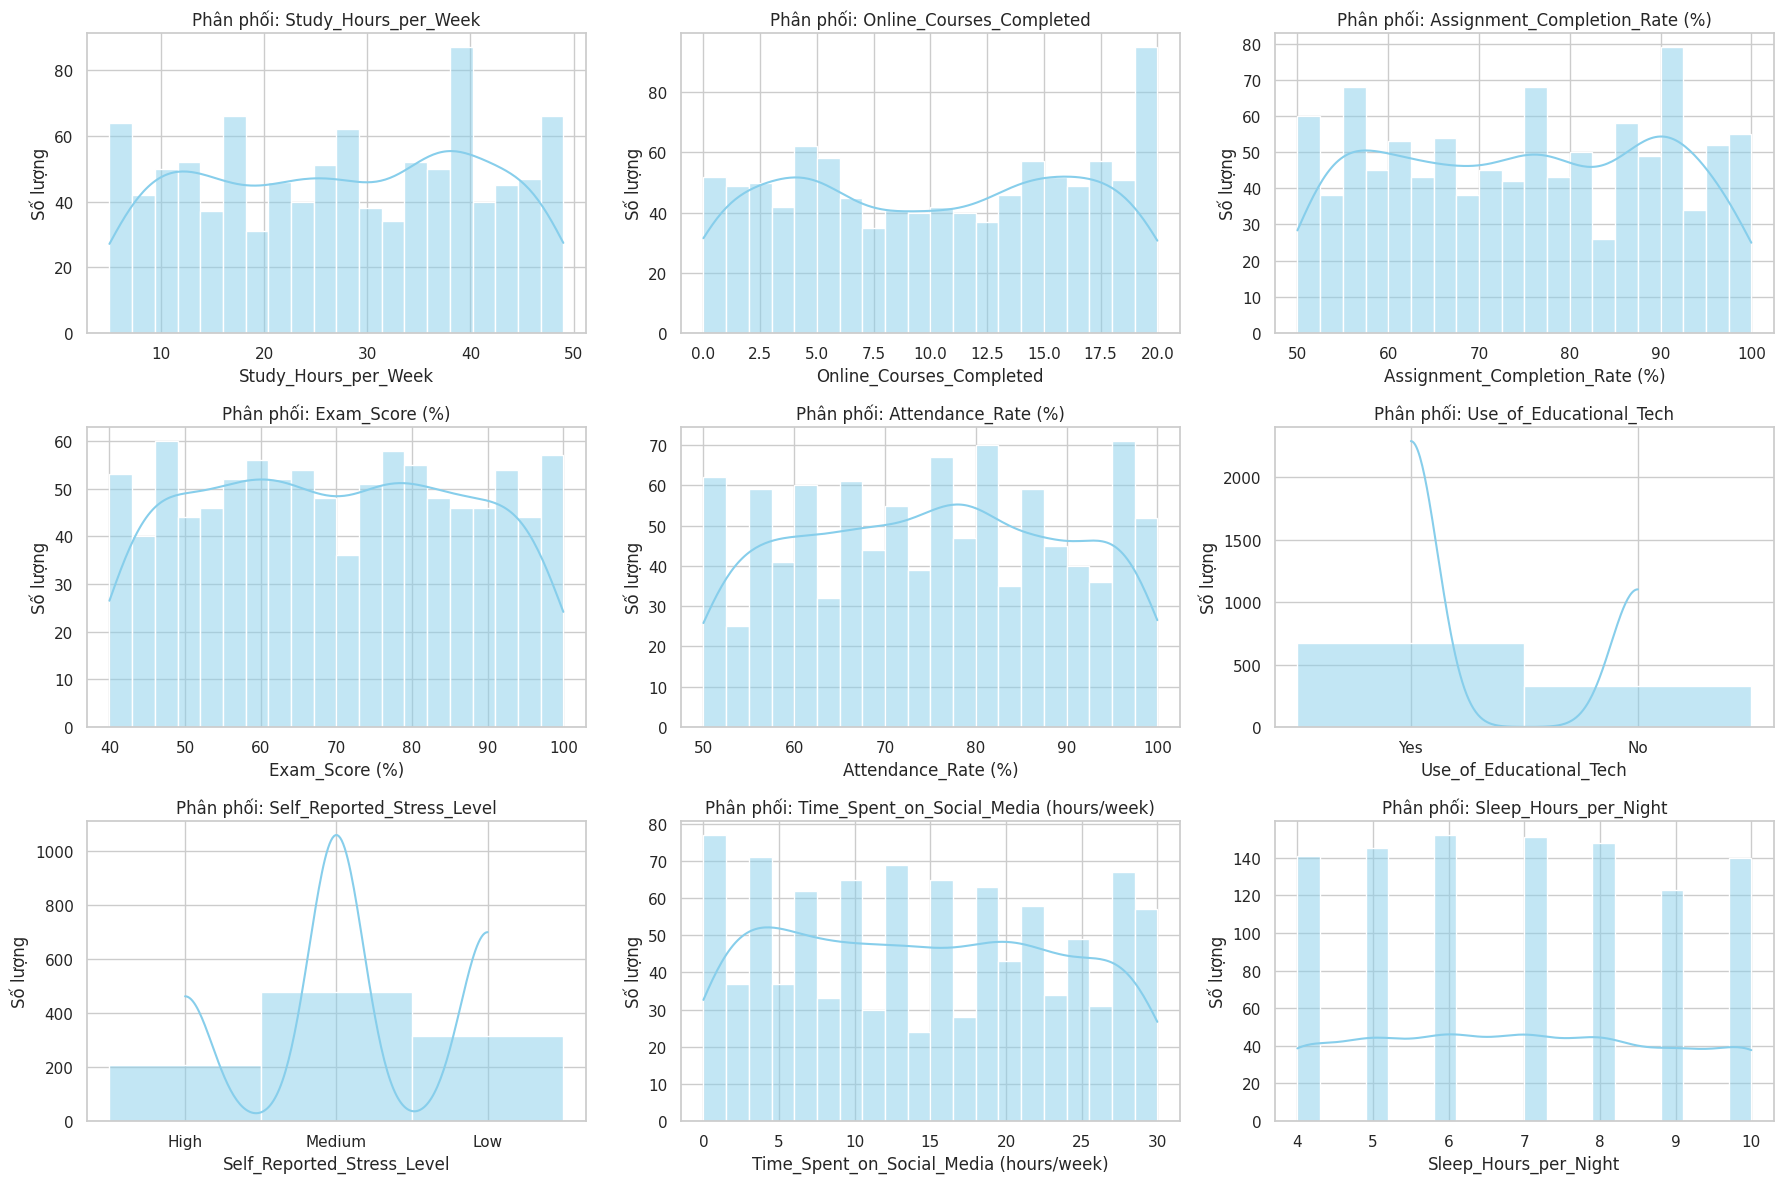

In [22]:
# Vẽ histogram cho từng biến
n_cols = 3
n_rows = (len(features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.histplot(df[col], kde=True, bins=20, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Phân phối: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Số lượng')

# Xóa các ô trống nếu có
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


=== Linear Regression ===
R²: 0.933
MAE: 0.238

=== Random Forest ===
R²: 1.000
MAE: 0.000


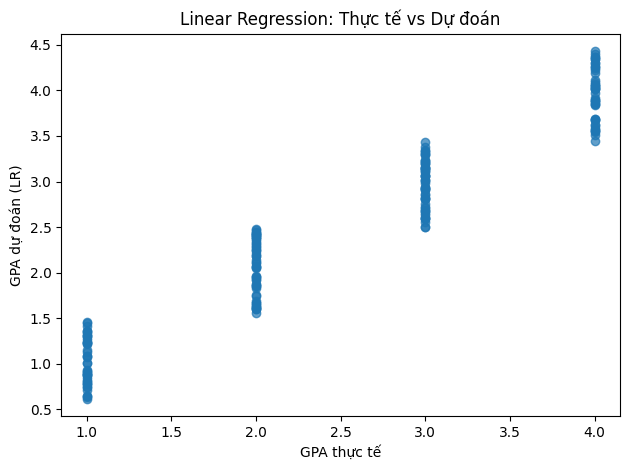

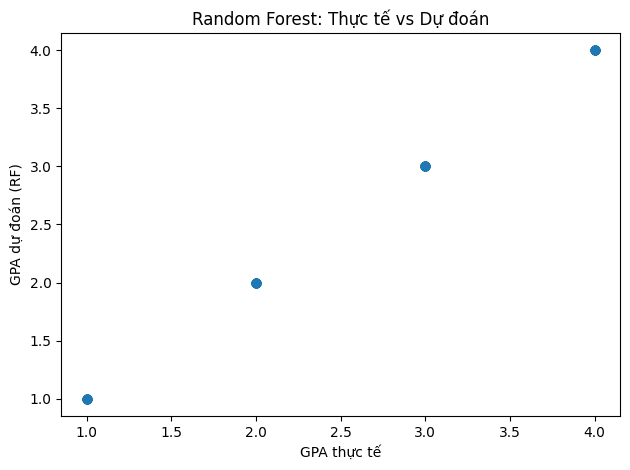

In [10]:
# Mã hoá biến categorical
X = pd.get_dummies(X, columns=['Use_of_Educational_Tech', 'Self_Reported_Stress_Level'], drop_first=True)

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

{
    "Total samples": data.shape[0],
    "Training samples": X_train.shape[0],
    "Testing samples": X_test.shape[0],
    "Feature columns": X_train.columns.tolist(),
    "Encoded feature shape": X_train.shape[1]
}

# Huấn luyện Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Huấn luyện Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Đánh giá mô hình
print("=== Linear Regression ===")
print(f"R²: {r2_score(y_test, y_pred_lr):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.3f}")
print("\n=== Random Forest ===")
print(f"R²: {r2_score(y_test, y_pred_rf):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.3f}")

# Biểu đồ scatter: thực tế vs dự đoán
# Linear Regression
plt.figure()
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.xlabel("GPA thực tế")
plt.ylabel("GPA dự đoán (LR)")
plt.title("Linear Regression: Thực tế vs Dự đoán")
plt.tight_layout()

# Random Forest
plt.figure()
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.xlabel("GPA thực tế")
plt.ylabel("GPA dự đoán (RF)")
plt.title("Random Forest: Thực tế vs Dự đoán")
plt.tight_layout()

plt.show()

Kiểm thử 1 lần nữa với file test.csv

  Final_Grade  GPA_True  Pred_GPA_LR Pred_Grade_LR  Pred_GPA_RF Pred_Grade_RF
0           D       1.0     0.596974             F          1.0             D
1           A       4.0     3.454737             B          4.0             A
2           D       1.0     1.185197             D          1.0             D
3           C       2.0     1.876725             C          2.0             C
4           D       1.0     1.235447             D          1.0             D

Linear Regression:
  R²: 0.934400748496407
  MAE: 0.2502967936386481
Random Forest:
  R²: 1.0
  MAE: 0.0


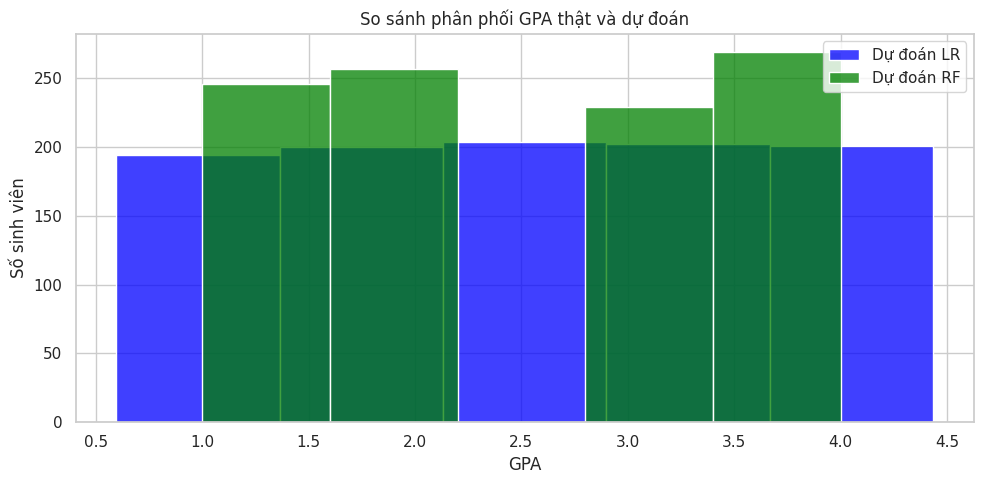

In [16]:
# Đọc dữ liệu test
df_test = pd.read_csv("test.csv")

# (Tuỳ chọn) Nếu có Final_Grade, ánh xạ sang GPA để so sánh
if 'Final_Grade' in df_test.columns:
    grade_to_gpa = {'A': 4.0, 'B': 3.0, 'C': 2.0, 'D': 1.0, 'F': 0.0}
    df_test['GPA_True'] = df_test['Final_Grade'].map(grade_to_gpa)
else:
    df_test['GPA_True'] = None  # Không có ground truth

features = [
    'Study_Hours_per_Week',
    'Online_Courses_Completed',
    'Assignment_Completion_Rate (%)',
    'Exam_Score (%)',
    'Attendance_Rate (%)',
    'Use_of_Educational_Tech',
    'Self_Reported_Stress_Level',
    'Time_Spent_on_Social_Media (hours/week)',
    'Sleep_Hours_per_Night'
]

X_test_new = df_test[features]
X_test_encoded = pd.get_dummies(X_test_new, columns=['Use_of_Educational_Tech', 'Self_Reported_Stress_Level'], drop_first=True)

# Khớp cột với dữ liệu huấn luyện
missing_cols = set(X_train.columns) - set(X_test_encoded.columns)
for col in missing_cols:
    X_test_encoded[col] = 0
X_test_encoded = X_test_encoded[X_train.columns]

# Dự đoán
df_test['Pred_GPA_LR'] = lr.predict(X_test_encoded)
df_test['Pred_GPA_RF'] = rf.predict(X_test_encoded)

# Chuyển sang điểm chữ
def gpa_to_grade(gpa):
    if gpa >= 3.7: return 'A'
    elif gpa >= 2.7: return 'B'
    elif gpa >= 1.7: return 'C'
    elif gpa >= 0.7: return 'D'
    else: return 'F'

df_test['Pred_Grade_LR'] = df_test['Pred_GPA_LR'].apply(gpa_to_grade)
df_test['Pred_Grade_RF'] = df_test['Pred_GPA_RF'].apply(gpa_to_grade)

# In kết quả mẫu
print(df_test[['Final_Grade', 'GPA_True', 'Pred_GPA_LR', 'Pred_Grade_LR', 'Pred_GPA_RF', 'Pred_Grade_RF']].head())

# Đánh giá nếu có GPA thật
if df_test['GPA_True'].notnull().all():
    print("\nLinear Regression:")
    print("  R²:", r2_score(df_test['GPA_True'], df_test['Pred_GPA_LR']))
    print("  MAE:", mean_absolute_error(df_test['GPA_True'], df_test['Pred_GPA_LR']))
    print("Random Forest:")
    print("  R²:", r2_score(df_test['GPA_True'], df_test['Pred_GPA_RF']))
    print("  MAE:", mean_absolute_error(df_test['GPA_True'], df_test['Pred_GPA_RF']))

# Vẽ histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_test['Pred_GPA_LR'], label='Dự đoán LR', bins=5, color='blue')
sns.histplot(df_test['Pred_GPA_RF'], label='Dự đoán RF', bins=5, color='green')
plt.title("So sánh phân phối GPA thật và dự đoán")
plt.xlabel("GPA")
plt.ylabel("Số sinh viên")
plt.legend()
plt.tight_layout()
plt.show()

Lưu model joblib

In [23]:
import os

save_path = '/content/drive/MyDrive/AC2060'


import joblib

joblib.dump(rf, 'trained_rf_model.joblib')
joblib.dump(lr, 'trained_lr_model.joblib')


['trained_lr_model.joblib']